GoPro Assignment for Interview - GoPro Reddit Data Analysis

Dataset of labeled tweets with sentiment came from: https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment?resource=download

By Zack DeNoto


In [69]:
#Necessary imports for code to run
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
import time
from datetime import date, timedelta
import random
import matplotlib.pyplot as plt
import en_core_web_sm
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
import numpy as np
from matplotlib.ticker import MaxNLocator

In [21]:
#sets variables needed for Reddit API
client_id = 'iDUQhuwXahi8NqNC5CQ5AQ'
secret_key = 'hHNozcJgIv1soIbVlLCpLBtY8P7fsA'

In [22]:
#sets authentication variable for Reddit API
auth = requests.auth.HTTPBasicAuth(client_id, secret_key)

In [23]:
#sets headers variable for Reddit API
headers = {'User-Agent': 'GP-Assessment/0.0.1'}

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------

**Please note the code for the next 3 blocks are dependant on when you run it. See comments in each block for what to do * *

In [24]:
#sets data variable for Reddit API. If you get an error then comment out the block of code and paste the access code into the next line. 
#The Reddit API only provides one access code per 24 hours, if you restart the kernal after that, you need to paste the access_token
#in the line below to retrieve the data

data = {
    'grant_type': 'password',
    'username': 'gp-interview',
    'password': 'gpinterview2022'
}

#sets response from Reddit API call
response = requests.post("https://ssl.reddit.com/api/v1/access_token",
                  data=data,
                  auth=auth)

print(response.text)

'\ndata = {\n    \'grant_type\': \'password\',\n    \'username\': \'gp-interview\',\n    \'password\': \'gpinterview2022\'\n}\n\n#sets response from Reddit API call\nresponse = requests.post("https://ssl.reddit.com/api/v1/access_token",\n                  data=data,\n                  auth=auth)\n\nprint(response.text)'

In [25]:
#uncomment this out if you get an error in the previous code section. Paste the access code from the previous code block in here

#access_token = '1823900129179-SczkVIj41AxVp7TOWnibs50XoPeHLA'

In [26]:
#sets access token from Reddit API response. If you get an error from the Reddit API response, comment out the line below 
access_token = response.json()['access_token']

In [ ]:
#--------------------------------------------------------------------------------------------------------------------------------------------------

In [27]:
#sets header authorization token for Reddit API response
headers['Authorization'] = f'bearer {access_token}'

In [28]:
#verifies access to Reddit API
requests.get('https://oauth.reddit.com/api/v1/me', headers = headers ).json()

{'accept_followers': True,
 'awardee_karma': 0,
 'awarder_karma': 0,
 'can_create_subreddit': True,
 'can_edit_name': False,
 'coins': 0,
 'comment_karma': 0,
 'created': 1652831323.0,
 'created_utc': 1652831323.0,
 'features': {'awards_on_streams': True,
  'chat': True,
  'chat_group_rollout': True,
  'chat_subreddit': True,
  'chat_user_settings': True,
  'cookie_consent_banner': True,
  'crowd_control_for_post': True,
  'do_not_track': True,
  'expensive_coins_package': True,
  'is_email_permission_required': False,
  'mod_awards': True,
  'mod_service_mute_reads': True,
  'mod_service_mute_writes': True,
  'modlog_copyright_removal': True,
  'mweb_xpromo_interstitial_comments_android': True,
  'mweb_xpromo_interstitial_comments_ios': True,
  'mweb_xpromo_modal_listing_click_daily_dismissible_android': True,
  'mweb_xpromo_modal_listing_click_daily_dismissible_ios': True,
  'noreferrer_to_noopener': True,
  'premium_subscriptions_table': True,
  'promoted_trend_blanks': True,
  'res

In [29]:
#sets variable to get information on GoPro subreddit from Reddit API
go_pro_subreddit_about = requests.get('https://oauth.reddit.com/r/gopro/about',
                   headers = headers)

In [30]:
#gets number of subscribers for GoPro subreddit 
number_of_users = go_pro_subreddit_about.json()['data']['subscribers']

In [31]:
#prints number of users 
number_of_users

141897

In [32]:
#creates dataframe for tracking the date and associated number of users for that day
#this would be run daily at the same time to stay consistant

df = pd.DataFrame(columns=['Date','Number of Users'])
df = df.append({'Date': date.today(), 'Number of Users': number_of_users}, ignore_index= True)
df

,Date,Number of Users
0,2022-05-20,141897


In [33]:
#scenario to show tracked users for over a year
#in reality the data would be stored in a database daily at a certain time everyday and used instead

num_users = number_of_users

for n in range(1,400):
  day = date.today() - timedelta(days=n)
  num_users = num_users - random.randint(-50, 50)
  df = df.append({'Date': day, 'Number of Users': num_users}, ignore_index= True)

df

,Date,Number of Users
0,2022-05-20,141897
1,2022-05-19,141861
2,2022-05-18,141869
3,2022-05-17,141901
4,2022-05-16,141876
...,...,...
395,2021-04-20,142033
396,2021-04-19,142056
397,2021-04-18,142105
398,2021-04-17,142075


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


[Text(0, 141500.0, '141,500'),
 Text(0, 141600.0, '141,600'),
 Text(0, 141700.0, '141,700'),
 Text(0, 141800.0, '141,800'),
 Text(0, 141900.0, '141,900'),
 Text(0, 142000.0, '142,000'),
 Text(0, 142100.0, '142,100'),
 Text(0, 142200.0, '142,200'),
 Text(0, 142300.0, '142,300'),
 Text(0, 142400.0, '142,400')]

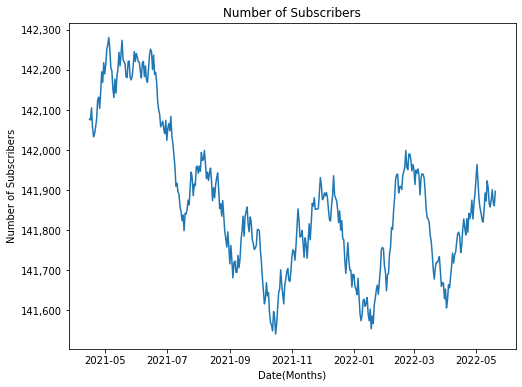

In [34]:
#plots the number of subscribers over a year

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(df['Date'], df['Number of Users'])
plt.xlabel("Date(Months)")
plt.ylabel("Number of Subscribers")
plt.title("Number of Subscribers")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [35]:
#creates new dataframe for only Q1 of 2022 to track subscribers

df.dtypes
df['Date'] = pd.to_datetime(df['Date'])
first_quarter = df[(df['Date'] > "2022-01-01") & (df['Date'] < "2022-04-01")]

In [36]:
#prints out Q1 dataframe
first_quarter

,Date,Number of Users
50,2022-03-31,141629
51,2022-03-30,141668
52,2022-03-29,141669
53,2022-03-28,141660
54,2022-03-27,141697
...,...,...
134,2022-01-06,141638
135,2022-01-05,141680
136,2022-01-04,141639
137,2022-01-03,141653


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':


[Text(0, 141500.0, '141,500'),
 Text(0, 141600.0, '141,600'),
 Text(0, 141700.0, '141,700'),
 Text(0, 141800.0, '141,800'),
 Text(0, 141900.0, '141,900'),
 Text(0, 142000.0, '142,000'),
 Text(0, 142100.0, '142,100')]

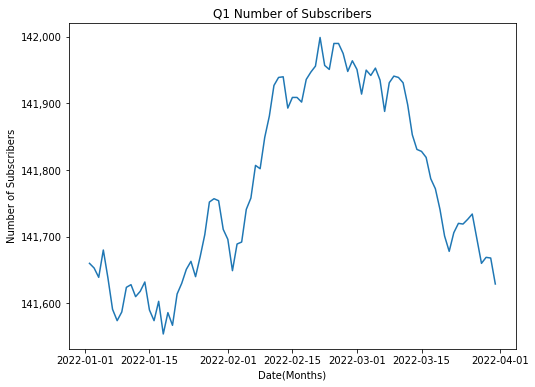

In [37]:
#plots the number of subscribers for the first quarter

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(first_quarter['Date'], first_quarter['Number of Users'])
plt.xlabel("Date(Months)")
plt.ylabel("Number of Subscribers")
plt.title("Q1 Number of Subscribers")
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])

In [39]:
#gets the data from the api for the latest reddit posts on the GoPro subreddit
req = requests.get('https://oauth.reddit.com/r/gopro/new',
                   headers = headers,
                   params = {'limit': '100'} )

In [40]:
#prints the different keys for the incoming data
for post in req.json()['data']['children']:
  print()
post['data'].keys()

dict_keys(['approved_at_utc', 'subreddit', 'selftext', 'author_fullname', 'saved', 'mod_reason_title', 'gilded', 'clicked', 'title', 'link_flair_richtext', 'subreddit_name_prefixed', 'hidden', 'pwls', 'link_flair_css_class', 'downs', 'thumbnail_height', 'top_awarded_type', 'hide_score', 'name', 'quarantine', 'link_flair_text_color', 'upvote_ratio', 'author_flair_background_color', 'subreddit_type', 'ups', 'total_awards_received', 'media_embed', 'thumbnail_width', 'author_flair_template_id', 'is_original_content', 'user_reports', 'secure_media', 'is_reddit_media_domain', 'is_meta', 'category', 'secure_media_embed', 'link_flair_text', 'can_mod_post', 'score', 'approved_by', 'is_created_from_ads_ui', 'author_premium', 'thumbnail', 'edited', 'author_flair_css_class', 'author_flair_richtext', 'gildings', 'content_categories', 'is_self', 'mod_note', 'created', 'link_flair_type', 'wls', 'removed_by_category', 'banned_by', 'author_flair_type', 'domain', 'allow_live_comments', 'selftext_html', 

In [41]:
#creates a dataframe 
df = pd.DataFrame()

In [42]:
#puts the data fields wanted into the dataframe

for post in req.json()['data']['children']:
  df = df.append({
      'subreddit': post['data']['subreddit'],
      'title' : post['data']['title'],
      'selftext': post['data']['selftext'],
      'upvoet_ratio': post['data']['upvote_ratio'],
      'ups': post['data']['ups'],
      'downs': post['data']['downs'],
      'score': post['data']['score'],
      'number_of_comments': post['data']['num_comments'],
      'author': post['data']['author'],
      'post_create_date_time': time.strftime("%m-%d-%Y %H:%M:%S", time.gmtime(post['data']['created_utc'])), #converts epoch to utc datetime
      'post_create_date': time.strftime("%m-%d-%Y", time.gmtime(post['data']['created_utc'])), #converts epoch to date
      'link': post['data']['url']
  }, ignore_index= True)



In [43]:
#allows to see the entire dataframe
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [44]:
#prints the dataframe
df

,subreddit,title,selftext,upvoet_ratio,ups,downs,score,number_of_comments,author,post_create_date_time,post_create_date,link
0,gopro,GoPro HERO10/HERO9 Critical Advisory,I've helped out many people with the latest Go...,1.00,1.0,0.0,1.0,0.0,gethypoxic,05-20-2022 19:10:07,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5bz0...
1,gopro,An auto rotating device,Hi I want something that i could put the go pr...,1.00,1.0,0.0,1.0,0.0,Acrobatic-Muffin-822,05-20-2022 19:07:39,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5a2x...
2,gopro,Is the GoPro MAX waterproof/suitable for under...,Hi all I’ve just been gifted a new GoPro MAX f...,1.00,1.0,0.0,1.0,1.0,bluefenceglass,05-20-2022 17:53:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu3qak...
3,gopro,Shore Diving the Coral Reefs of South Florida,,1.00,1.0,0.0,1.0,0.0,ddsk1191,05-20-2022 17:26:59,05-20-2022,https://v.redd.it/h4h1rf1z0o091
4,gopro,What is the best or your favorite GoPro model?,Can be any model/generation. Doesn’t just have...,1.00,1.0,0.0,1.0,5.0,FishermanMaster7903,05-20-2022 17:00:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu27bf...
5,gopro,GoPro 5 always overheating and battery dies quick,I have a GoPro 5 with two batteries. Recently ...,1.00,1.0,0.0,1.0,1.0,sean_c_4,05-20-2022 16:40:34,05-20-2022,https://www.reddit.com/r/gopro/comments/uu1l05...
6,gopro,some pic I got on my Hero 8 when on a camping ...,,0.84,4.0,0.0,4.0,0.0,FuzzyFanta724,05-20-2022 16:15:16,05-20-2022,https://www.reddit.com/gallery/uu0tt8
7,gopro,Sold my Fusion. Want to Buy a Max. Editing Que...,I have read that there are issues with the pro...,1.00,1.0,0.0,1.0,1.0,MHB24,05-20-2022 15:49:43,05-20-2022,https://www.reddit.com/r/gopro/comments/uu02lu...
8,gopro,Can i change the settings of a gopro 10 via cl...,i need to change the settings (profiles would ...,0.50,0.0,0.0,0.0,6.0,KnifeOfDunwall2,05-20-2022 15:21:14,05-20-2022,https://www.reddit.com/r/gopro/comments/utz89o...
9,gopro,Bought a Pelican Style case for my GoPro and a...,,0.90,39.0,0.0,39.0,12.0,NotAnotherBloodyKiwi,05-20-2022 13:52:54,05-20-2022,https://www.reddit.com/gallery/utwlt5


In [45]:
#reads in the csv file for tweets and puts only the text and sentiment into a new dataframe

tweets = pd.read_csv('Tweets.csv')
tweets = tweets[['text','airline_sentiment']]
print(tweets.shape)
tweets.head(10)

(14640, 2)


,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
7,@VirginAmerica Really missed a prime opportuni...,neutral
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive


In [46]:
#removes any neutral tweets to only show positive and negative sentiments
uptweets = tweets[tweets['airline_sentiment'] != 'neutral']
print(uptweets.shape)
uptweets.head(10)

(11541, 2)


,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative
5,@VirginAmerica seriously would pay $30 a fligh...,negative
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
12,@VirginAmerica This is such a great deal! Alre...,positive
13,@VirginAmerica @virginmedia I'm flying your #f...,positive


In [47]:
#show the number of positive and negative tweets breakdown
uptweets["airline_sentiment"].value_counts()

negative    9178
positive    2363
Name: airline_sentiment, dtype: int64

In [48]:
#factorizes positive and negative sentiments into 0 and 1 for analysis
sl = uptweets.airline_sentiment.factorize()
sl

(array([0, 1, 1, ..., 0, 1, 1]),
 Index(['positive', 'negative'], dtype='object'))

In [49]:
#gets the text data
tweets = uptweets.text.values

In [50]:
#tokenizes the words in the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)

In [51]:
#replaces words with their assigned numbers and pads sentences to equal length
encoded_docs = tokenizer.texts_to_sequences(tweets)
padded_sequence = pad_sequences(encoded_docs, maxlen=200)

In [52]:
#creates the model to test the data with

embedding_vector_length = 32
model = Sequential()
model.add(Embedding(len(tokenizer.word_index) + 1, embedding_vector_length, input_length=200))
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           423488    
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 32)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 440,139
Trainable params: 440,139
Non-trainable params: 0
__________________________________________________

In [53]:
#trains the model for 5 epochs and a batch size of 32 with a validation split of 20%
history = model.fit(padded_sequence,sl[0],validation_split=0.2, epochs=5, batch_size=32)

Epoch 1/5
289/289 [==============================] - 67s 222ms/step - loss: 0.3975 - accuracy: 0.8352 - val_loss: 0.2122 - val_accuracy: 0.9199
Epoch 2/5
289/289 [==============================] - 63s 220ms/step - loss: 0.2232 - accuracy: 0.9162 - val_loss: 0.1680 - val_accuracy: 0.9359
Epoch 3/5
289/289 [==============================] - 63s 218ms/step - loss: 0.1679 - accuracy: 0.9373 - val_loss: 0.1652 - val_accuracy: 0.9359
Epoch 4/5
289/289 [==============================] - 63s 218ms/step - loss: 0.1338 - accuracy: 0.9531 - val_loss: 0.1692 - val_accuracy: 0.9394
Epoch 5/5
289/289 [==============================] - 68s 237ms/step - loss: 0.1134 - accuracy: 0.9573 - val_loss: 0.1772 - val_accuracy: 0.9346


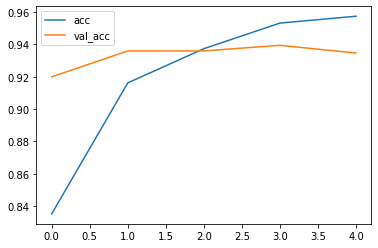

In [54]:
#plots the accuracy
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

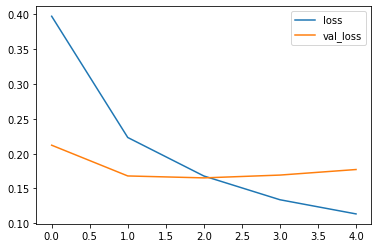

In [55]:
#plots the loss

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [56]:
#creates a function that takes a text as input and predicts either positive or negative label

def sentiment_prediction(text):
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    return sl[1][prediction]
    #print("Predicted label: ", sl[1][prediction])


test_sentence = "This is a test sentence, and the sun is out."
sentiment_prediction(test_sentence)


'positive'

In [57]:
#creates two new fields for title and post prediction and uses the newly created function to determine if the tile and post are positive or negative

df['Title_Prediction'] = ''
df['Post_Prediction'] = ''

for row in range(len(df)):
  #print(row)
  if df.loc[row,'selftext'] == '':
    df.at[row,'Title_Prediction'] = sentiment_prediction(df.loc[row,'title'])
    df.at[row,'Post_Prediction'] = ''
  elif df.loc[row,'selftext'] != '':
    df.at[row,'Title_Prediction'] = sentiment_prediction(df.loc[row,'title'])
    df.at[row,'Post_Prediction'] = sentiment_prediction(df.loc[row,'selftext'])

In [58]:
#prints the updated dataframe
df

,subreddit,title,selftext,upvoet_ratio,ups,downs,score,number_of_comments,author,post_create_date_time,post_create_date,link,Title_Prediction,Post_Prediction
0,gopro,GoPro HERO10/HERO9 Critical Advisory,I've helped out many people with the latest Go...,1.00,1.0,0.0,1.0,0.0,gethypoxic,05-20-2022 19:10:07,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5bz0...,negative,negative
1,gopro,An auto rotating device,Hi I want something that i could put the go pr...,1.00,1.0,0.0,1.0,0.0,Acrobatic-Muffin-822,05-20-2022 19:07:39,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5a2x...,negative,negative
2,gopro,Is the GoPro MAX waterproof/suitable for under...,Hi all I’ve just been gifted a new GoPro MAX f...,1.00,1.0,0.0,1.0,1.0,bluefenceglass,05-20-2022 17:53:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu3qak...,negative,negative
3,gopro,Shore Diving the Coral Reefs of South Florida,,1.00,1.0,0.0,1.0,0.0,ddsk1191,05-20-2022 17:26:59,05-20-2022,https://v.redd.it/h4h1rf1z0o091,positive,
4,gopro,What is the best or your favorite GoPro model?,Can be any model/generation. Doesn’t just have...,1.00,1.0,0.0,1.0,5.0,FishermanMaster7903,05-20-2022 17:00:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu27bf...,positive,negative
5,gopro,GoPro 5 always overheating and battery dies quick,I have a GoPro 5 with two batteries. Recently ...,1.00,1.0,0.0,1.0,1.0,sean_c_4,05-20-2022 16:40:34,05-20-2022,https://www.reddit.com/r/gopro/comments/uu1l05...,positive,negative
6,gopro,some pic I got on my Hero 8 when on a camping ...,,0.84,4.0,0.0,4.0,0.0,FuzzyFanta724,05-20-2022 16:15:16,05-20-2022,https://www.reddit.com/gallery/uu0tt8,positive,
7,gopro,Sold my Fusion. Want to Buy a Max. Editing Que...,I have read that there are issues with the pro...,1.00,1.0,0.0,1.0,1.0,MHB24,05-20-2022 15:49:43,05-20-2022,https://www.reddit.com/r/gopro/comments/uu02lu...,negative,negative
8,gopro,Can i change the settings of a gopro 10 via cl...,i need to change the settings (profiles would ...,0.50,0.0,0.0,0.0,6.0,KnifeOfDunwall2,05-20-2022 15:21:14,05-20-2022,https://www.reddit.com/r/gopro/comments/utz89o...,negative,negative
9,gopro,Bought a Pelican Style case for my GoPro and a...,,0.90,39.0,0.0,39.0,12.0,NotAnotherBloodyKiwi,05-20-2022 13:52:54,05-20-2022,https://www.reddit.com/gallery/utwlt5,negative,


In [59]:
#Creates new field for overall prediction. If the post only has a title, then it'll be used as the overall prediction. 
#However, if the post has words in it, the post prediction will be used as the overall prediction.

df['Overall_Prediction'] = ''

for row in range(len(df)):
  #print(row)
  if df.loc[row,'Post_Prediction'] == '':
    df.at[row,'Overall_Prediction'] = (df.loc[row,'Title_Prediction'])
  elif df.loc[row,'Post_Prediction'] != '':
    df.at[row,'Overall_Prediction'] = (df.loc[row,'Post_Prediction'])

In [60]:
#prints the updated dataframe
df

,subreddit,title,selftext,upvoet_ratio,ups,downs,score,number_of_comments,author,post_create_date_time,post_create_date,link,Title_Prediction,Post_Prediction,Overall_Prediction
0,gopro,GoPro HERO10/HERO9 Critical Advisory,I've helped out many people with the latest Go...,1.00,1.0,0.0,1.0,0.0,gethypoxic,05-20-2022 19:10:07,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5bz0...,negative,negative,negative
1,gopro,An auto rotating device,Hi I want something that i could put the go pr...,1.00,1.0,0.0,1.0,0.0,Acrobatic-Muffin-822,05-20-2022 19:07:39,05-20-2022,https://www.reddit.com/r/gopro/comments/uu5a2x...,negative,negative,negative
2,gopro,Is the GoPro MAX waterproof/suitable for under...,Hi all I’ve just been gifted a new GoPro MAX f...,1.00,1.0,0.0,1.0,1.0,bluefenceglass,05-20-2022 17:53:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu3qak...,negative,negative,negative
3,gopro,Shore Diving the Coral Reefs of South Florida,,1.00,1.0,0.0,1.0,0.0,ddsk1191,05-20-2022 17:26:59,05-20-2022,https://v.redd.it/h4h1rf1z0o091,positive,,positive
4,gopro,What is the best or your favorite GoPro model?,Can be any model/generation. Doesn’t just have...,1.00,1.0,0.0,1.0,5.0,FishermanMaster7903,05-20-2022 17:00:59,05-20-2022,https://www.reddit.com/r/gopro/comments/uu27bf...,positive,negative,negative
5,gopro,GoPro 5 always overheating and battery dies quick,I have a GoPro 5 with two batteries. Recently ...,1.00,1.0,0.0,1.0,1.0,sean_c_4,05-20-2022 16:40:34,05-20-2022,https://www.reddit.com/r/gopro/comments/uu1l05...,positive,negative,negative
6,gopro,some pic I got on my Hero 8 when on a camping ...,,0.84,4.0,0.0,4.0,0.0,FuzzyFanta724,05-20-2022 16:15:16,05-20-2022,https://www.reddit.com/gallery/uu0tt8,positive,,positive
7,gopro,Sold my Fusion. Want to Buy a Max. Editing Que...,I have read that there are issues with the pro...,1.00,1.0,0.0,1.0,1.0,MHB24,05-20-2022 15:49:43,05-20-2022,https://www.reddit.com/r/gopro/comments/uu02lu...,negative,negative,negative
8,gopro,Can i change the settings of a gopro 10 via cl...,i need to change the settings (profiles would ...,0.50,0.0,0.0,0.0,6.0,KnifeOfDunwall2,05-20-2022 15:21:14,05-20-2022,https://www.reddit.com/r/gopro/comments/utz89o...,negative,negative,negative
9,gopro,Bought a Pelican Style case for my GoPro and a...,,0.90,39.0,0.0,39.0,12.0,NotAnotherBloodyKiwi,05-20-2022 13:52:54,05-20-2022,https://www.reddit.com/gallery/utwlt5,negative,,negative


<AxesSubplot:>

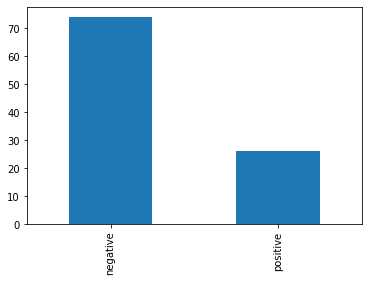

In [61]:
#plots the number of positive and negative reddit posts
df['Overall_Prediction'].value_counts().plot.bar()

In [62]:
#groups the positive and negative posts by the post create date
data = df.groupby(['post_create_date','Overall_Prediction']).size()
print(data)

post_create_date  Overall_Prediction
05-16-2022        negative              21
                  positive               7
05-17-2022        negative              11
                  positive               8
05-18-2022        negative              14
                  positive               4
05-19-2022        negative              15
                  positive               4
05-20-2022        negative              13
                  positive               3
dtype: int64


In [63]:
#creates a new table to plot the positive and negative posts by date


dates1 = df['post_create_date'].unique()
dates = []
for each in dates1:
  dates.append(each)

dates.sort()
print(dates)

positive = []
negative = []

for date in dates:
  tmp =  df[(df['post_create_date'] == date)]
  try:
    positive.append(tmp['Overall_Prediction'].value_counts()['positive'])
  except :
    positive.append(0)
    
  
  try:
    negative.append(tmp['Overall_Prediction'].value_counts()['negative'])
  except :
    negative.append(0)
    

print(positive)
print(negative)

['05-16-2022', '05-17-2022', '05-18-2022', '05-19-2022', '05-20-2022']
[7, 8, 4, 4, 3]
[21, 11, 14, 15, 13]


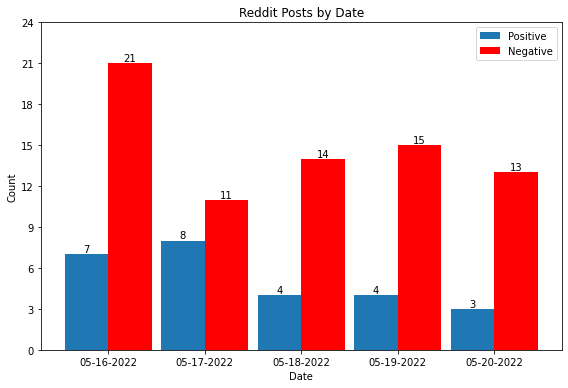

In [73]:
#plots the positive and negative posts by date
labels = dates


x = np.arange(len(labels))  # the label locations
width = 0.45  # the width of the bars
plt.rcParams["figure.figsize"] = (8,5.5) # changes size of chart



fig, ax = plt.subplots()
pos = ax.bar(x - width/2, positive, width, label='Positive')
neg = ax.bar(x + width/2, negative, width, label='Negative', color = 'red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_xlabel('Date')
ax.set_ylabel('Count')
ax.set_title('Reddit Posts by Date')
ax.set_xticks(x, labels)
ax.legend()

yint = []
locs, labels = plt.yticks()
for each in locs:
    yint.append(int(each))
plt.yticks(yint)

ax.bar_label(pos)
ax.bar_label(neg)

fig.tight_layout()

plt.show()